### Random Forest on Sequencing

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier as RFC

In [2]:
api_data = pd.read_csv('playlist_data_with_sequencing_4.8.17.csv')
api_data = api_data.dropna()
del api_data['Unnamed: 0']
del api_data['names']
del api_data['playlist_id']
api_data.head()

,acousticness,danceability,duration,energy,featured,followers,instrumentalness,key,liveness,loudness,...,p4_mode,p4_popularity,p4_tempo,p4_time_signature,p4_valence,popularity,tempo,time_signature,total_tracks,valence
0,0.1325,0.6995,217744.5,0.5920,False,14284402,0.000005,3.0,0.1130,-5.0260,...,1.0,75.230769,110.9910,4.0,0.4180,79.120000,102.2015,4.0,50,0.4910
1,0.0318,0.7675,220976.5,0.5255,False,6061263,0.000032,3.0,0.1070,-7.6295,...,1.0,68.153846,121.5470,4.0,0.3520,72.420000,142.0510,4.0,59,0.3110
2,0.1334,0.7275,226361.5,0.6060,True,2954185,0.000000,4.5,0.1035,-5.6395,...,0.0,55.000000,92.9790,4.0,0.3930,65.660000,127.4455,4.0,50,0.4855
3,0.0254,0.5820,214781.0,0.8185,False,2586720,0.000008,8.0,0.1665,-5.1860,...,1.0,58.307692,100.0430,4.0,0.3790,62.460000,123.4825,4.0,50,0.6320
4,0.8790,0.5530,216173.0,0.3170,False,2462696,0.003090,3.0,0.1100,-11.5270,...,1.0,51.150000,117.9865,4.0,0.3495,54.320513,124.8580,4.0,78,0.3130


In [3]:
api_data['featured'] = api_data.featured.astype(int)

In [4]:
api_data2 = api_data.copy()
api_data2['featured'] = api_data2.featured.astype(int)

In [3]:
api_data2 = api_data.copy()
api_data2['featured'] = api_data2.featured.astype(int)
feature_list = ['acousticness',
 'danceability',
 'duration',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mean_num_markets',
 'mode',
 'p1_acousticness',
 'p1_danceability',
 'p1_duration',
 'p1_energy',
 'p1_instrumentalness',
 'p1_key',
 'p1_liveness',
 'p1_loudness',
 'p1_mean_num_markets',
 'p1_mode',
 'p1_popularity',
 'p1_tempo',
 'p1_time_signature',
 'p1_valence',
 'p2_acousticness',
 'p2_danceability',
 'p2_duration',
 'p2_energy',
 'p2_instrumentalness',
 'p2_key',
 'p2_liveness',
 'p2_loudness',
 'p2_mean_num_markets',
 'p2_mode',
 'p2_popularity',
 'p2_tempo',
 'p2_time_signature',
 'p2_valence',
 'p3_acousticness',
 'p3_danceability',
 'p3_duration',
 'p3_energy',
 'p3_instrumentalness',
 'p3_key',
 'p3_liveness',
 'p3_loudness',
 'p3_mean_num_markets',
 'p3_mode',
 'p3_popularity',
 'p3_tempo',
 'p3_time_signature',
 'p3_valence',
 'p4_acousticness',
 'p4_danceability',
 'p4_duration',
 'p4_energy',
 'p4_instrumentalness',
 'p4_key',
 'p4_liveness',
 'p4_loudness',
 'p4_mean_num_markets',
 'p4_mode',
 'p4_popularity',
 'p4_tempo',
 'p4_time_signature',
 'p4_valence',
 'popularity',
 'tempo',
 'total_tracks',
 'valence']

In [5]:
a = pd.qcut(api_data["followers"], 5,labels=range(1,6))
api_data['followers'] = np.array(a)

In [9]:
#rfc = RFC(n_estimators = 100)
y = api_data['followers']
X = api_data.drop(['followers'],axis=1)
#rfc.fit(X, y)

In [7]:
preds = []
for row in X.iterrows():
    preds.append(int(rfc.predict(row[1].reshape(1,-1))))

/Users/omarabboud1/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


In [6]:
def misclass_rate(pred, y):
    incorr = 0
    for i in range(len(pred)):
        if pred[i] != y[i]:
            incorr += 1
    return float(incorr)/float(len(pred))

In [9]:
misclass_rate(preds, list(y))

0.0030826140567200987

In [10]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

for feature in feature_list:
    try:
        ser, bins = pd.qcut(X_train[feature], 5, retbins = True, labels=range(1,6))
        bins[0] = -100000000
        bins[5] = 100000000
        X_train[feature] = ser
        X_test[feature] = np.digitize(X_test[feature],bins)
    except:
        'error'


/Users/omarabboud1/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/omarabboud1/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [142]:
ser, bins = pd.qcut(y_train, 5, retbins = True, labels=range(1,6))
bins[0] = -100000000
bins[5] = 100000000
print bins
y_train = np.digitize(y_train, bins)
y_test = np.digitize(y_test, bins)

[ -1.00000000e+08   3.57600000e+02   1.61660000e+03   1.14074000e+04
   1.38580600e+05   1.00000000e+08]


In [143]:
Counter(y_train)

Counter({1: 227, 2: 227, 3: 227, 4: 227, 5: 227})

In [144]:
Counter(y_test)

Counter({1: 89, 2: 92, 3: 110, 4: 103, 5: 93})

In [165]:
int(round(np.sqrt(len(X_train.iloc[0]))))

8

In [7]:
def weighting(y):

    counter = Counter(y)
    maximum = max(counter.values())
    return {genre: float(maximum / count) for genre, count in counter.items()}

In [187]:
weights = weighting()
weights

{1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0}

In [199]:
from sklearn.ensemble import GradientBoostingClassifier as GBC

In [191]:
rfc = RFC(oob_score = True, max_features = int(round(np.sqrt(len(X_train.iloc[0])))), \
          class_weight={1: 1.0, 2: 1.0, 3: 1.0, 4: 100.0, 5: 100.0})
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True,
            class_weight={1: 1.0, 2: 1.0, 3: 1.0, 4: 100.0, 5: 100.0},
            criterion='gini', max_depth=None, max_features=8,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [233]:
from sklearn import svm

In [230]:
rfc = GBC(min_weight_fraction_leaf=0.1)
rfc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.1,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [252]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [279]:
rfc = RFC()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [280]:
tr_preds = []
for row in X_train:
    tr_preds.append(int(rfc.predict(row.reshape(1,-1))))
    
te_preds = []
for row in X_test:
    te_preds.append(int(rfc.predict(row.reshape(1,-1)))) 

In [281]:
print misclass_rate(tr_preds, list(y_train))
print misclass_rate(te_preds, list(y_test))

0.0105726872247
0.681724845996


In [282]:
confusion_matrix(list(y_train), tr_preds,labels=[1,2,3,4,5])

array([[226,   1,   0,   0,   0],
       [  2, 222,   0,   0,   3],
       [  0,   3, 224,   0,   0],
       [  1,   1,   0, 225,   0],
       [  0,   1,   0,   0, 226]])

In [283]:
confusion_matrix(list(y_test), te_preds,labels=[1,2,3,4,5])

array([[46, 16, 12,  9,  6],
       [27, 16, 19, 15, 15],
       [28, 18, 26, 24, 14],
       [24, 27, 19, 19, 14],
       [ 8, 18,  5, 14, 48]])

In [284]:
tree.export_graphviz(rfc,out_file='tree.dot')   

AttributeError: 'RandomForestClassifier' object has no attribute 'tree_'

The baseline random forest model classifies training observations with >99% accuracy and testing observations with 39% accuracy.

### Model Tuning

In [319]:
rfc = RFC(n_estimators = 100, max_depth = 29)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=29, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [75]:
tr_preds = []
for row in X_train.iterrows():
    tr_preds.append(int(rfc.predict(row[1].reshape(1,-1))))
    
te_preds = []
for row in X_test.iterrows():
    te_preds.append(int(rfc.predict(row[1].reshape(1,-1)))) 
    
print misclass_rate(tr_preds, list(y_train))
print misclass_rate(te_preds, list(y_test))

0.00184162062615
0.611940298507


In [79]:
max([estimator.tree_.max_depth for estimator in rfc.estimators_])

29

In [12]:
train_errors = []
test_errors = []
for i in [1,5,10,20,30,50,70,100]:
    rfc = RFC(n_estimators = i)
    rfc.fit(X_train, y_train)
    
    tr_preds = []
    for row in X_train.iterrows():
        tr_preds.append(int(rfc.predict(row[1].reshape(1,-1))))

    te_preds = []
    for row in X_test.iterrows():
        te_preds.append(int(rfc.predict(row[1].reshape(1,-1)))) 

    train_errors.append(misclass_rate(tr_preds, list(y_train)))
    test_errors.append(misclass_rate(te_preds, list(y_test)))

/Users/omarabboud1/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Users/omarabboud1/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [13]:
errors = pd.DataFrame([train_errors,test_errors]).T
errors.columns = ['Train','Test']
errors.head()

,Train,Test
0,0.274009,0.698152
1,0.071366,0.714579
2,0.013216,0.665298
3,0.003524,0.626283
4,0.002643,0.628337


In [37]:
train_errors = []
test_errors = []
for i in [1,4,8,15,20,25,30]:
    rfc = RFC(n_estimators = 100, max_depth = i)
    rfc.fit(X_train, y_train)
    
    tr_preds = []
    for row in X_train.iterrows():
        tr_preds.append(int(rfc.predict(row[1].reshape(1,-1))))

    te_preds = []
    for row in X_test.iterrows():
        te_preds.append(int(rfc.predict(row[1].reshape(1,-1)))) 

    train_errors.append(misclass_rate(tr_preds, list(y_train)))
    test_errors.append(misclass_rate(te_preds, list(y_test)))

/Users/omarabboud1/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Users/omarabboud1/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [40]:
tlist = [1,4,8,15,20,25,30]
errors = pd.DataFrame([train_errors,test_errors,tlist]).T
errors.columns = ['Train','Test','Depth']
errors.head()

,Train,Test,Depth
0,0.639648,0.648871,1.0
1,0.469604,0.609856,4.0
2,0.069604,0.583162,8.0
3,0.002643,0.589322,15.0
4,0.002643,0.620123,20.0


### Max Depth

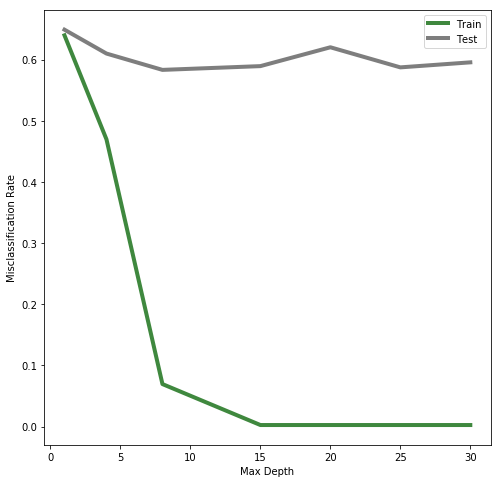

In [41]:
from matplotlib import pyplot as plt
%matplotlib inline

x = np.linspace(1,len([1,5,10,20,30,50,70,100]),len([1,5,10,20,30,50,70,100]))
plt.figure(figsize=(8,8))
plt.plot(tlist, train_errors, color = "#3F883E", linewidth = 4, label="Train")
plt.plot(tlist, test_errors, color = "#7e7e7e",linewidth=4, label="Test")
plt.xlabel('Max Depth')
plt.ylabel('Misclassification Rate')
plt.legend()
plt.show()

### Min Leaf Sample Size

In [131]:
train_errors = []
test_errors = []
leafs = [1,5,10,20,30,40,50,60,70,80,90,100,200,500]
for l in leafs:
    rfc = RFC(n_estimators = 100, min_samples_leaf = l)
    rfc.fit(X_train, y_train)

    tr_preds = []
    for row in X_train.iterrows():
        tr_preds.append(int(rfc.predict(row[1].reshape(1,-1))))

    te_preds = []
    for row in X_test.iterrows():
        te_preds.append(int(rfc.predict(row[1].reshape(1,-1)))) 

    train_errors.append(misclass_rate(tr_preds, list(y_train)))
    test_errors.append(misclass_rate(te_preds, list(y_test)))
    print 'Finished ' + str(l)

Finished 1
Finished 5
Finished 10
Finished 20
Finished 30
Finished 40
Finished 50
Finished 60
Finished 70
Finished 80
Finished 90
Finished 100
Finished 200
Finished 500


In [132]:
errors_2 = pd.DataFrame([train_errors,test_errors]).T
errors_2.columns = ['Train','Test']
errors_2.head()

,Train,Test
0,0.001842,0.613806
1,0.046041,0.597015
2,0.199816,0.597015
3,0.385820,0.597015
4,0.466851,0.600746


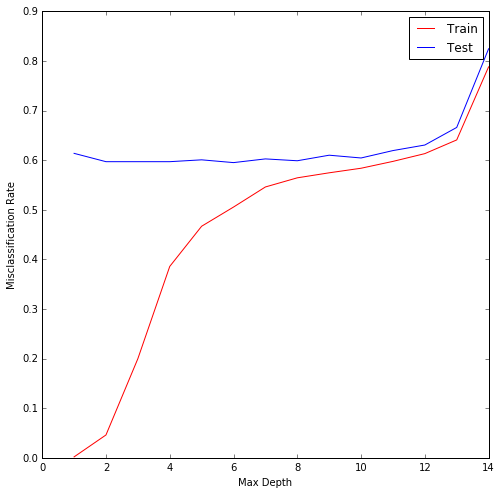

In [135]:
x = np.linspace(1,len(leafs),len(leafs))
plt.figure(figsize=(8,8))
plt.plot(x, train_errors, color = "red", label="Train")
plt.plot(x, test_errors, color = "blue", label="Test")
plt.xlabel('Max Depth')
plt.ylabel('Misclassification Rate')
plt.legend()
plt.show()

In [6]:
varImp(rfc)

NameError: name 'varImp' is not defined

In [307]:
rfc = RFC(n_estimators = 100, class_weight={1:0.1,2:0.15,3:0.6,4:0.8,5:0.8})
rfc.fit(X_train, y_train)

tr_preds = []
for row in X_train.iterrows():
    tr_preds.append(int(rfc.predict(row[1].reshape(1,-1))))
    
te_preds = []
for row in X_test.iterrows():
    te_preds.append(int(rfc.predict(row[1].reshape(1,-1)))) 
    
print misclass_rate(tr_preds, list(y_train))
print misclass_rate(te_preds, list(y_test))

ValueError: Class label 1 not present.

In [154]:
rfc.predict_proba(X_train.iloc[0].reshape(1,-1))

array([[ 0.03,  0.69,  0.2 ,  0.07,  0.01]])

### Binned Dataset

In [20]:
from sklearn.cross_validation import train_test_split

In [21]:
y = api_data['followers']
X = api_data.drop(['followers'],axis=1)
X = X.drop(['featured'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [231]:
X_train.isnull().values.any()

False

In [267]:
ser2, bins2 = pd.qcut(y_train, 5, retbins = True, labels = range(1,6))
y_train = pd.cut(y_train, bins=bins2,labels=range(1,6),include_lowest=True)
y_test = pd.cut(y_test, bins=bins2,labels=range(1,6),include_lowest=True)
for feat in feature_list:
    try:
        ser, bins = pd.qcut(X_train[feat], 5,retbins = True, labels=range(1,6))
        bins[0] = -100000000
        bins[5] = 100000000
        a = pd.cut(X_train[feat], bins=bins,labels=range(1,6),include_lowest=True)
        b = pd.cut(X_test[feat], bins=bins,labels=range(1,6),include_lowest=True)
        if a.isnull().values.any() != True and b.isnull().values.any() != True:
            X_train[feat] = a
            X_test[feat] = b
    except:
        'error'

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [268]:
X_train['featured'] = X_train['featured'].astype(int)
X_train.head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,acousticness,danceability,duration,energy,featured,instrumentalness,key,liveness,loudness,mean_num_markets,...,p4_mode,p4_popularity,p4_tempo,p4_time_signature,p4_valence,popularity,tempo,time_signature,total_tracks,valence
163,5,3,1,1,0,0.000000,2,3,2,3,...,1.0,1,4,4.0,5,1,4,4.0,3,5
1152,4,4,2,2,0,0.000465,4,2,3,4,...,0.5,4,2,4.0,3,4,4,4.0,2,1
1626,4,2,1,3,0,0.000107,4,5,3,5,...,1.0,4,1,4.0,3,4,2,4.0,1,4
326,5,1,5,1,0,0.878000,3,2,1,5,...,1.0,1,1,4.0,1,1,1,4.0,3,1
1676,5,2,4,1,0,0.000017,2,3,2,2,...,1.0,1,4,4.0,1,1,1,4.0,1,1


In [269]:
X_test['featured'] = X_test['featured'].astype(int)
X_test.head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,acousticness,danceability,duration,energy,featured,instrumentalness,key,liveness,loudness,mean_num_markets,...,p4_mode,p4_popularity,p4_tempo,p4_time_signature,p4_valence,popularity,tempo,time_signature,total_tracks,valence
1208,4,3,4,2,0,0.00440,5,2,2,1,...,1.0,3,4,4.0,1,2,1,4.0,1,1
791,1,2,3,5,0,0.00000,1,5,5,1,...,0.0,2,2,4.0,2,2,5,4.0,1,2
991,2,2,3,3,0,0.00175,4,2,3,2,...,1.0,2,4,4.0,3,2,5,4.0,4,3
1052,5,4,5,1,0,0.00000,2,4,1,5,...,1.0,1,1,3.0,2,1,2,4.0,5,1
1159,2,4,2,5,0,0.00000,2,1,5,4,...,1.0,3,3,4.0,5,2,4,4.0,1,5


In [259]:
ser, bins = pd.qcut(X_train['duration'], 5, retbins = True, labels=range(1,6))
print bins
for ix, val in enumerate(pd.cut(X_test['duration'], bins = bins, labels = range(1,6)).isnull()):
    if val == True:
        print ix

[   45000.    203467.    219133.5   233440.    256143.   3107826. ]
181


In [265]:
bins[0] = -100000000
bins[5] = 100000000
bins

array([  4.50000000e+04,   2.03467000e+05,   2.19133500e+05,
         2.33440000e+05,   2.56143000e+05,   1.00000000e+09])

### Random Forest Episode 2

In [3]:
rfc = RFC(n_estimators = 100, max_depth = 29)
rfc.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [271]:
tr_preds = []
for row in X_train.iterrows():
    tr_preds.append(int(rfc.predict(row[1].reshape(1,-1))))
    
te_preds = []
for row in X_test.iterrows():
    te_preds.append(int(rfc.predict(row[1].reshape(1,-1)))) 
    
print misclass_rate(tr_preds, list(y_train))
print misclass_rate(te_preds, list(y_test))

0.0
0.615671641791


### Song Querying Code

In [11]:
import numpy as np
import pandas as pd
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import sys
from sklearn.metrics import mean_squared_error
from math import sqrt

In [12]:
client_credentials_manager = SpotifyClientCredentials(client_id='df846cfd28e745178054587b3484f91c',                                                client_secret='e3d39fc92a954e028ff1490288f3fe5c')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [9]:
def chunks(seq, num):
    avg = len(seq) / float(num)
    out = []
    last = 0.0
    
    while last < len(seq):
        out.append(seq[int(last):int(last + avg)])
        last += avg
        
    return out

def gen_score(list_of_tracks):
            
    parts = chunks(list_of_tracks,4)
                    
    p1 = parts[0]
    p2 = parts[1]
    p3 = parts[2]
    p4 = parts[3]
    
    t_popularities = []
    t_num_markets = []
                
    for track in list_of_tracks:
        listing = sp.track(track)
        t_popularities.append(listing['popularity'])
        t_num_markets.append(len(listing['available_markets']))
                                        
    t_pop = np.mean(t_popularities)
    t_av_num_markets = np.mean(t_num_markets)

    t_features = sp.audio_features(tracks = list_of_tracks)
    feat_len = len(list_of_tracks)
    t_feature_matrix = np.empty((feat_len,12))
    for ix, song in enumerate(t_features):
  
        t_feature_matrix[ix][0] = song['acousticness']
        t_feature_matrix[ix][1] = song['danceability']
        t_feature_matrix[ix][2] = song['energy']
        t_feature_matrix[ix][3] = song['instrumentalness']
        t_feature_matrix[ix][4] = song['key']
        t_feature_matrix[ix][5] = song['liveness']
        t_feature_matrix[ix][6] = song['loudness']
        t_feature_matrix[ix][7] = song['mode']
        t_feature_matrix[ix][8] = song['tempo']
        t_feature_matrix[ix][9] = song['time_signature']
        t_feature_matrix[ix][10] = song['valence']
        t_feature_matrix[ix][11] = song['duration_ms']
                            
    t_feature_median = np.percentile(t_feature_matrix,50,axis=0)
                    # Part 1
                    
    p1_popularities = []
    p1_num_markets = []
                    
    for track in p1:
        listing = sp.track(track)
        p1_popularities.append(listing['popularity'])
        p1_num_markets.append(len(listing['available_markets']))
    
    p1_pop = np.mean(p1_popularities)
    p1_av_num_markets = np.mean(p1_num_markets)
    
    p1_features = sp.audio_features(tracks = p1)
    p1_len = len(p1)
    p1_feature_matrix = np.empty((p1_len,12))
                    
    for ix, song in enumerate(p1_features):
        p1_feature_matrix[ix][0] = song['acousticness']
        p1_feature_matrix[ix][1] = song['danceability']
        p1_feature_matrix[ix][2] = song['energy']
        p1_feature_matrix[ix][3] = song['instrumentalness']
        p1_feature_matrix[ix][4] = song['key']
        p1_feature_matrix[ix][5] = song['liveness']
        p1_feature_matrix[ix][6] = song['loudness']
        p1_feature_matrix[ix][7] = song['mode']
        p1_feature_matrix[ix][8] = song['tempo']
        p1_feature_matrix[ix][9] = song['time_signature']
        p1_feature_matrix[ix][10] = song['valence']
        p1_feature_matrix[ix][11] = song['duration_ms']
                        
    p1_feature_median = np.percentile(p1_feature_matrix,50,axis=0)
                    # Part 2
                    
    p2_popularities = []
    p2_num_markets = []
                    
    for track in p2:
        listing = sp.track(track)
        p2_popularities.append(listing['popularity'])
        p2_num_markets.append(len(listing['available_markets']))
    
    p2_pop = np.mean(p2_popularities)
    p2_av_num_markets = np.mean(p2_num_markets)
    
    p2_features = sp.audio_features(tracks = p2)
    p2_len = len(p2)
    p2_feature_matrix = np.empty((p2_len,12))
                    
    for ix, song in enumerate(p2_features):
        p2_feature_matrix[ix][0] = song['acousticness']
        p2_feature_matrix[ix][1] = song['danceability']
        p2_feature_matrix[ix][2] = song['energy']
        p2_feature_matrix[ix][3] = song['instrumentalness']
        p2_feature_matrix[ix][4] = song['key']
        p2_feature_matrix[ix][5] = song['liveness']
        p2_feature_matrix[ix][6] = song['loudness']
        p2_feature_matrix[ix][7] = song['mode']
        p2_feature_matrix[ix][8] = song['tempo']
        p2_feature_matrix[ix][9] = song['time_signature']
        p2_feature_matrix[ix][10] = song['valence']
        p2_feature_matrix[ix][11] = song['duration_ms']
                        
    p2_feature_median = np.percentile(p2_feature_matrix,50,axis=0)
    
                        # Part 3
                    
    p3_popularities = []
    p3_num_markets = []
                  
    for track in p3:
        listing = sp.track(track)
        p3_popularities.append(listing['popularity'])
        p3_num_markets.append(len(listing['available_markets']))
    
    p3_pop = np.mean(p3_popularities)
    p3_av_num_markets = np.mean(p3_num_markets)
    
    p3_features = sp.audio_features(tracks = p3)
    p3_len = len(p3)
    p3_feature_matrix = np.empty((p3_len,12))
                    
    for ix, song in enumerate(p3_features):
        p3_feature_matrix[ix][0] = song['acousticness']
        p3_feature_matrix[ix][1] = song['danceability']
        p3_feature_matrix[ix][2] = song['energy']
        p3_feature_matrix[ix][3] = song['instrumentalness']
        p3_feature_matrix[ix][4] = song['key']
        p3_feature_matrix[ix][5] = song['liveness']
        p3_feature_matrix[ix][6] = song['loudness']
        p3_feature_matrix[ix][7] = song['mode']
        p3_feature_matrix[ix][8] = song['tempo']
        p3_feature_matrix[ix][9] = song['time_signature']
        p3_feature_matrix[ix][10] = song['valence']
        p3_feature_matrix[ix][11] = song['duration_ms']
                        
    p3_feature_median = np.percentile(p3_feature_matrix,50,axis=0)
    
                        # Part 4
                    
    p4_popularities = []
    p4_num_markets = []
                    
    for track in p4:
        listing = sp.track(track)
        p4_popularities.append(listing['popularity'])
        p4_num_markets.append(len(listing['available_markets']))
    
    p4_pop = np.mean(p4_popularities)
    p4_av_num_markets = np.mean(p4_num_markets)
    
    p4_features = sp.audio_features(tracks = p4)
    p4_len = len(p4)
    p4_feature_matrix = np.empty((p4_len,12))
                    
    for ix, song in enumerate(p4_features):
        p4_feature_matrix[ix][0] = song['acousticness']
        p4_feature_matrix[ix][1] = song['danceability']
        p4_feature_matrix[ix][2] = song['energy']
        p4_feature_matrix[ix][3] = song['instrumentalness']
        p4_feature_matrix[ix][4] = song['key']
        p4_feature_matrix[ix][5] = song['liveness']
        p4_feature_matrix[ix][6] = song['loudness']
        p4_feature_matrix[ix][7] = song['mode']
        p4_feature_matrix[ix][8] = song['tempo']
        p4_feature_matrix[ix][9] = song['time_signature']
        p4_feature_matrix[ix][10] = song['valence']
        p4_feature_matrix[ix][11] = song['duration_ms']
                        
    p4_feature_median = np.percentile(p4_feature_matrix,50,axis=0)
           
    playlist_data = pd.Series({
                    #'followers': followers,
                    #'names' : names,
                    #'playlist_id' : playlist_ids,
                    'total_tracks' : len(list_of_tracks),
                    #'featured' : featured,
                    'acousticness': p1_feature_median[0],
                    'danceability': p1_feature_median[1],
                    'energy': p1_feature_median[2],
                    'instrumentalness': p1_feature_median[3],
                    'key': p1_feature_median[4],
                    'liveness': p1_feature_median[5],
                    'loudness': p1_feature_median[6],
                    'mode': p1_feature_median[7],
                    'tempo': p1_feature_median[8],
                    'time_signature': p1_feature_median[9],
                    'valence': p1_feature_median[10],
                    'duration': p1_feature_median[11],
                    'popularity':np.mean(t_pop),
                    'mean_num_markets': np.mean(t_av_num_markets),
                    #'avg_years' : t_release_date,

                    'p1_acousticness': p1_feature_median[0],
                    'p1_danceability': p1_feature_median[1],
                    'p1_energy': p1_feature_median[2],
                    'p1_instrumentalness': p1_feature_median[3],
                    'p1_key': p1_feature_median[4],
                    'p1_liveness': p1_feature_median[5],
                    'p1_loudness': p1_feature_median[6],
                    'p1_mode': p1_feature_median[7],
                    'p1_tempo': p1_feature_median[8],
                    'p1_time_signature': p1_feature_median[9],
                    'p1_valence': p1_feature_median[10],
                    'p1_duration': p1_feature_median[11],
                    'p1_popularity': p1_pop,
                    'p1_mean_num_markets': p1_av_num_markets,
                    #'p1_avg_years': p1_release_date,

                    'p2_acousticness': p2_feature_median[0],
                    'p2_danceability': p2_feature_median[1],
                    'p2_energy': p2_feature_median[2],
                    'p2_instrumentalness': p2_feature_median[3],
                    'p2_key': p2_feature_median[4],
                    'p2_liveness': p2_feature_median[5],
                    'p2_loudness': p2_feature_median[6],
                    'p2_mode': p2_feature_median[7],
                    'p2_tempo': p2_feature_median[8],
                    'p2_time_signature': p2_feature_median[9],
                    'p2_valence': p2_feature_median[10],
                    'p2_duration': p2_feature_median[11],
                    'p2_popularity': p2_pop,
                    'p2_mean_num_markets': p2_av_num_markets,
                    #'p2_avg_years': p2_release_date,

                    'p3_acousticness': p3_feature_median[0],
                    'p3_danceability': p3_feature_median[1],
                    'p3_energy': p3_feature_median[2],
                    'p3_instrumentalness': p3_feature_median[3],
                    'p3_key': p3_feature_median[4],
                    'p3_liveness': p3_feature_median[5],
                    'p3_loudness': p3_feature_median[6],
                    'p3_mode': p3_feature_median[7],
                    'p3_tempo': p3_feature_median[8],
                    'p3_time_signature': p3_feature_median[9],
                    'p3_valence': p3_feature_median[10],
                    'p3_duration': p3_feature_median[11],
                    'p3_popularity': p3_pop,
                    'p3_mean_num_markets': p3_av_num_markets,
                    #'p3_avg_years': p3_release_date,

                    'p4_acousticness': p4_feature_median[0],
                    'p4_danceability': p4_feature_median[1],
                    'p4_energy': p4_feature_median[2],
                    'p4_instrumentalness': p4_feature_median[3],
                    'p4_key': p4_feature_median[4],
                    'p4_liveness': p4_feature_median[5],
                    'p4_loudness': p4_feature_median[6],
                    'p4_mode': p4_feature_median[7],
                    'p4_tempo': p4_feature_median[8],
                    'p4_time_signature': p4_feature_median[9],
                    'p4_valence': p4_feature_median[10],
                    'p4_duration': p4_feature_median[11],
                    'p4_popularity': p4_pop,
                    'p4_mean_num_markets': p4_av_num_markets
                    #'p4_avg_years': p4_release_date
        })
    return playlist_data


In [13]:
test = sp.track('6rqhFgbbKwnb9MLmUQDhG6')
test['available_markets']

[]

In [14]:
list_of_tracks = ['5BtjqPsi2Mgg9OGBh4lQnh','12IoBmDGa1jVnFrsaFYxY3','2h19P4PvzSs1Sp7gqZvzWg',
                 '0qweeIYNNLMlGrX4czWMi1','2yYIKbcr1CelmIteDzEAFD','19dbOzZNsQPRYbgaCqZaAm',
                 '69sjO8JHcKM2dG8IezfzfJ']
playlist = gen_score(list_of_tracks)

In [22]:
rfc = RFC(n_estimators = 100, max_depth = 29)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=29, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [23]:
playlist.values[34]

44.0

In [24]:
problist = rfc.predict_proba(playlist.reshape(1,-1))[0]
problist

array([ 0.26,  0.25,  0.23,  0.17,  0.09])

In [321]:
X_train.iloc[0]

acousticness             0.852
danceability            0.5835
duration                 69063
energy                   0.417
featured                 False
instrumentalness             0
key                       10.5
liveness                 0.326
loudness                -9.223
mean_num_markets          40.8
mode                         1
p1_acousticness          0.852
p1_danceability         0.5835
p1_duration              69063
p1_energy                0.417
p1_instrumentalness          0
p1_key                    10.5
p1_liveness              0.326
p1_loudness             -9.223
p1_mean_num_markets    35.1667
p1_mode                      1
p1_popularity          3.66667
p1_tempo               130.658
p1_time_signature          3.5
p1_valence               0.823
p2_acousticness          0.826
p2_danceability          0.569
p2_duration             113354
p2_energy                0.477
p2_instrumentalness          0
                        ...   
p3_energy               0.4765
p3_instr

In [14]:
rfc = RFC(n_estimators = 100, class_weight={1: 4, 2:1, 3:1, 4:1, 5:1})
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True,
            class_weight={1: 4, 2: 1, 3: 1, 4: 1, 5: 1}, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [78]:
tr_preds = []
for row in X_train.iterrows():
    tr_preds.append(int(rfc.predict(row[1].reshape(1,-1))))
    
te_preds = []
for row in X_test.iterrows():
    te_preds.append(int(rfc.predict(row[1].reshape(1,-1)))) 
    
print misclass_rate(tr_preds, list(y_train))
print misclass_rate(te_preds, list(y_test))

/Users/omarabboud1/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()
/Users/omarabboud1/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


0.000920810313076
0.621268656716


In [147]:
p = rfc.predict_proba(X_test)
p

array([[ 0.03 ,  0.7  ,  0.11 ,  0.13 ,  0.03 ],
       [ 0.08 ,  0.68 ,  0.06 ,  0.06 ,  0.12 ],
       [ 0.11 ,  0.67 ,  0.04 ,  0.15 ,  0.03 ],
       ..., 
       [ 0.06 ,  0.04 ,  0.05 ,  0.02 ,  0.83 ],
       [ 0.074,  0.744,  0.072,  0.08 ,  0.03 ],
       [ 0.02 ,  0.07 ,  0.65 ,  0.06 ,  0.2  ]])

In [77]:
new_probas = []
for item in p:
    a = item
    if list(item).index(max(item)) == 0:
        a[0] = 0
        new_probas.append(a)
    else:
        new_probas.append(a)

In [14]:
def gen_preds(probas):
    preds = []
    for a in probas:
        preds.append(a.index(max(a)) + 1)
    return preds

In [74]:
new = gen_preds(new_probas)
new

[3,
 5,
 2,
 2,
 2,
 3,
 2,
 5,
 3,
 4,
 5,
 2,
 3,
 2,
 5,
 5,
 5,
 5,
 3,
 2,
 4,
 3,
 4,
 2,
 4,
 5,
 2,
 2,
 4,
 3,
 5,
 5,
 4,
 2,
 5,
 3,
 4,
 2,
 3,
 5,
 4,
 5,
 5,
 5,
 4,
 5,
 5,
 2,
 5,
 5,
 3,
 2,
 3,
 5,
 4,
 2,
 5,
 3,
 4,
 5,
 2,
 3,
 3,
 2,
 4,
 4,
 4,
 2,
 4,
 5,
 3,
 3,
 2,
 4,
 4,
 5,
 4,
 2,
 5,
 3,
 5,
 3,
 4,
 5,
 4,
 3,
 3,
 5,
 3,
 5,
 3,
 3,
 5,
 2,
 5,
 3,
 2,
 4,
 3,
 3,
 3,
 5,
 3,
 3,
 5,
 3,
 5,
 2,
 3,
 3,
 5,
 2,
 5,
 5,
 4,
 3,
 3,
 5,
 3,
 3,
 3,
 3,
 2,
 3,
 2,
 5,
 5,
 5,
 2,
 5,
 5,
 2,
 5,
 5,
 5,
 5,
 5,
 3,
 2,
 5,
 2,
 3,
 2,
 4,
 3,
 2,
 5,
 3,
 3,
 5,
 5,
 3,
 3,
 4,
 3,
 5,
 3,
 3,
 5,
 3,
 5,
 4,
 2,
 2,
 3,
 4,
 2,
 5,
 5,
 4,
 5,
 5,
 2,
 3,
 3,
 2,
 5,
 2,
 5,
 5,
 5,
 2,
 2,
 3,
 5,
 5,
 3,
 5,
 3,
 4,
 2,
 3,
 3,
 5,
 2,
 5,
 2,
 4,
 3,
 5,
 4,
 3,
 4,
 5,
 2,
 3,
 2,
 4,
 5,
 3,
 3,
 5,
 5,
 5,
 3,
 3,
 3,
 4,
 3,
 3,
 5,
 5,
 2,
 4,
 5,
 5,
 2,
 2,
 3,
 3,
 4,
 2,
 5,
 5,
 3,
 4,
 5,
 3,
 3,
 2,
 3,
 5,
 3,
 4,
 5,
 3,
 2,
 2,
 5,
 4,


In [72]:
misclass_rate(new, list(y_test))

0.6753731343283582

In [73]:
new_probas

[array([ 0.17,  0.19,  0.25,  0.21,  0.18]),
 array([ 0.03,  0.1 ,  0.06,  0.12,  0.69]),
 array([ 0.21,  0.29,  0.17,  0.21,  0.12]),
 array([ 0.  ,  0.26,  0.21,  0.14,  0.07]),
 array([ 0.16,  0.29,  0.29,  0.19,  0.07]),
 array([ 0.13,  0.21,  0.28,  0.18,  0.2 ]),
 array([ 0.  ,  0.19,  0.19,  0.17,  0.15]),
 array([ 0.18,  0.18,  0.24,  0.13,  0.27]),
 array([ 0.13,  0.21,  0.28,  0.11,  0.27]),
 array([ 0.  ,  0.25,  0.15,  0.27,  0.02]),
 array([ 0.05,  0.18,  0.21,  0.24,  0.32]),
 array([ 0.  ,  0.27,  0.15,  0.14,  0.04]),
 array([ 0.11,  0.11,  0.63,  0.09,  0.06]),
 array([ 0.06,  0.67,  0.05,  0.15,  0.07]),
 array([ 0.03,  0.18,  0.05,  0.09,  0.65]),
 array([ 0.11,  0.23,  0.14,  0.13,  0.39]),
 array([ 0.  ,  0.13,  0.15,  0.22,  0.25]),
 array([ 0.07,  0.22,  0.18,  0.08,  0.45]),
 array([ 0.23,  0.21,  0.41,  0.15,  0.  ]),
 array([ 0.  ,  0.21,  0.09,  0.1 ,  0.04]),
 array([ 0.2 ,  0.24,  0.16,  0.36,  0.04]),
 array([ 0.03      ,  0.42333333,  0.49666667,  0.05   

In [11]:

def condense_proba(p):
    new_probas = []
    for a in p:
        cat = a[0] + a[1] + a[2]
        new_probas.append([float(cat), float(a[3]), float(a[4])])
    return new_probas

In [12]:
def condense_y(y_list):
    new_list = []
    for y in y_list:
        if y == 1 or y == 2 or y == 3:
            new_list.append(3)
        else:
            new_list.append(y)
    return new_list

In [102]:
condense_y(list(y_test))

[4,
 5,
 3,
 3,
 3,
 3,
 3,
 5,
 5,
 3,
 5,
 3,
 4,
 3,
 5,
 5,
 5,
 5,
 4,
 3,
 3,
 3,
 3,
 4,
 3,
 4,
 4,
 3,
 3,
 3,
 4,
 3,
 3,
 4,
 5,
 3,
 3,
 4,
 3,
 5,
 5,
 4,
 3,
 3,
 4,
 5,
 5,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 4,
 4,
 3,
 5,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 4,
 3,
 3,
 4,
 3,
 3,
 3,
 5,
 4,
 3,
 3,
 4,
 5,
 4,
 4,
 3,
 4,
 4,
 3,
 4,
 3,
 5,
 4,
 3,
 5,
 4,
 5,
 3,
 5,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 3,
 5,
 4,
 5,
 3,
 3,
 3,
 4,
 3,
 5,
 3,
 3,
 4,
 4,
 5,
 4,
 5,
 3,
 5,
 3,
 5,
 4,
 3,
 4,
 5,
 5,
 4,
 4,
 4,
 4,
 3,
 3,
 4,
 3,
 3,
 4,
 3,
 3,
 5,
 5,
 5,
 3,
 4,
 3,
 5,
 3,
 3,
 5,
 3,
 4,
 5,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 5,
 3,
 3,
 3,
 3,
 5,
 4,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 3,
 3,
 5,
 3,
 3,
 3,
 5,
 4,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 5,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 5,
 5,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 3,
 5,
 5,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 4,
 4,
 3,
 4,
 3,
 3,
 3,
 3,


In [194]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

In [33]:
list(y_train)

[2,
 5,
 1,
 2,
 2,
 1,
 1,
 1,
 5,
 3,
 2,
 2,
 3,
 4,
 1,
 5,
 4,
 1,
 3,
 3,
 3,
 1,
 3,
 3,
 5,
 3,
 5,
 2,
 5,
 1,
 5,
 3,
 3,
 2,
 4,
 1,
 3,
 5,
 5,
 2,
 1,
 1,
 2,
 5,
 5,
 5,
 5,
 5,
 5,
 2,
 4,
 5,
 2,
 4,
 4,
 4,
 4,
 3,
 2,
 2,
 1,
 1,
 1,
 4,
 5,
 1,
 2,
 1,
 5,
 2,
 4,
 1,
 1,
 3,
 2,
 5,
 1,
 5,
 3,
 2,
 3,
 4,
 3,
 2,
 1,
 3,
 5,
 3,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 5,
 3,
 4,
 4,
 4,
 5,
 5,
 5,
 2,
 5,
 4,
 1,
 1,
 5,
 4,
 3,
 5,
 3,
 3,
 2,
 2,
 5,
 2,
 1,
 4,
 3,
 3,
 4,
 4,
 2,
 1,
 3,
 5,
 2,
 3,
 2,
 3,
 1,
 5,
 5,
 4,
 2,
 3,
 5,
 1,
 1,
 2,
 5,
 2,
 1,
 1,
 3,
 4,
 2,
 4,
 2,
 2,
 2,
 2,
 5,
 1,
 3,
 3,
 4,
 5,
 4,
 3,
 4,
 2,
 1,
 4,
 3,
 2,
 3,
 2,
 3,
 4,
 1,
 1,
 2,
 1,
 3,
 1,
 3,
 3,
 5,
 5,
 2,
 2,
 4,
 4,
 4,
 5,
 3,
 2,
 5,
 3,
 2,
 3,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 3,
 4,
 2,
 3,
 1,
 1,
 3,
 1,
 2,
 2,
 3,
 2,
 3,
 5,
 4,
 2,
 2,
 3,
 5,
 3,
 3,
 3,
 2,
 2,
 3,
 5,
 3,
 5,
 1,
 3,
 4,
 2,
 4,
 5,
 5,
 5,
 4,
 1,
 3,
 1,
 2,
 5,
 4,
 4,
 2,
 4,
 5,
 2,
 4,


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rfc = RFC(n_estimators = 100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [26]:
misclass_rate(gen_preds(condense_proba(rfc.predict_proba(X_train))), condense_y(list(y_train)))

1.0

In [22]:
p2 = rfc.predict_proba(X_train)
p2 = condense_proba(p2)
p2 = gen_preds(p2)
y2 = condense_y(list(y_train))
misclass_rate(p2, y2)

1.0

In [28]:
p1 = rfc.predict_proba(X_test)
p1 = condense_proba(p1)
p1 = gen_preds(p1)
y1 = condense_y(list(y_test))
misclass_rate(p1, y1)

0.963076923076923

In [29]:
confusion_matrix(list(y2), p2,labels=[3,4,5])

array([[  0,   0,   0],
       [  0,   0,   0],
       [259,   0,   0]])

In [30]:
confusion_matrix(list(y1), p1,labels=[3,4,5])

array([[12,  0,  0],
       [10,  0,  0],
       [28,  0,  0]])

In [111]:
new_probas = []
for item in p:
    a = item
    if list(item).index(max(item)) == 0:
        a[0] = 0
        new_probas.append(a)
    else:
        new_probas.append(a)

[0.61, 0.21, 0.18]

In [79]:
confusion_matrix(list(y_test),te_preds)

array([[56, 12, 12,  5,  5],
       [36, 12, 28,  6, 29],
       [25, 11, 35, 14, 20],
       [30, 15, 28, 22, 35],
       [ 9,  5,  4,  4, 78]])

In [ ]:
def misclass_rate(pred, y):
    incorr = 0
    for i in range(len(pred)):
        if pred[i] != y[i]:
            incorr += 1
    return float(incorr)/float(len(pred))

In [125]:
def gen_preds(probas):
    preds = []
    for a in probas:
        preds.append(a.index(max(a)) + 3)
    return preds

In [126]:
gen_preds(new)

AttributeError: 'int' object has no attribute 'index'